# Monitoring the Ensemble
## Cross Validation of the Ensemble

This notebook provides tips and guidance for cross validation of the ensemble.

# SWAST Imports

In [1]:
import pandas as pd

#import warnings
#warnings.filterwarnings('ignore')

In [2]:
#to help with cross-val
import forecast_tools as ft

from forecast_tools.model_selection import (rolling_forecast_origin, 
                                            forecast_accuracy,
                                            cross_validation_score)

from forecast_tools.baseline import SNaive

from forecast_tools.metrics import mean_absolute_error


from swast_forecast.utility import (default_ensemble,
                                    forecast,
                                    pre_process_daily_data)

ft.__version__

Importing plotly failed. Interactive plots will not work.


'0.1.4'

In [3]:
# Constants

In [4]:
PATH = '../code/ambo_data/Daily_Responses_5_Years_2019_full.csv'

In [5]:
# Read in data
clean = pre_process_daily_data(path=PATH, 
                               observation_col='Actual_Value', 
                               index_col='Actual_dt')
clean.head()

ora,BNSSG,Cornwall,Devon,Dorset,Gloucestershire,OOA,Somerset,Trust,Wiltshire
actual_dt,,,,,,,,,
2013-12-30,415.0,220.0,502.0,336.0,129.0,NaN,183.0,2042.0,255.0
2013-12-31,420.0,236.0,468.0,302.0,128.0,NaN,180.0,1996.0,260.0
2014-01-01,549.0,341.0,566.0,392.0,157.0,NaN,213.0,2570.0,351.0
2014-01-02,450.0,218.0,499.0,301.0,115.0,NaN,167.0,2013.0,258.0
2014-01-03,419.0,229.0,503.0,304.0,135.0,NaN,195.0,2056.0,269.0


In [6]:
#ow many data points and time series...
clean.shape

(2193, 9)

In [7]:
swast_model = default_ensemble()

In [8]:
train_size = clean.shape[0] - 365
swast_model.fit(clean['Wiltshire'][:train_size])

In [9]:
swast_model.arima_model.start_params

array([ 5.72000000e+01,  4.41081403e-01, -1.12848632e+00,  1.43879243e-01,
       -1.23994530e-03,  2.77047586e-01, -1.75277229e-01,  4.52684687e+02])

In [10]:
swast_model.arima_model.param_names

['holiday', 'ar.L1', 'ma.L1', 'ma.L2', 'ma.L3', 'ar.S.L7', 'ma.S.L7', 'sigma2']

In [11]:
swast_model._arima_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                           Wiltshire   No. Observations:                 1828
Model:             SARIMAX(1, 1, 3)x(1, 0, [1], 7)   Log Likelihood               -7920.472
Date:                             Thu, 08 Oct 2020   AIC                          15856.944
Time:                                     10:03:36   BIC                          15900.979
Sample:                                 12-30-2013   HQIC                         15873.192
                                      - 12-31-2018                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       57.2156     11.133      5.139      0.000      35.396      79.035
ar.L1          0.6092      0.160      3.805      0.000       0.295       0.923
ma.L1         -1.3894      0.164     -8.486      0.000      -1.710      -1.068
ma.L2          0.4461      0.126      3.531      0.000       0.198       0.694
ma.L3         -0.0149      0.034     -0.441      0.659      -0.081       0.051
ar.S.L7        0.9987      0.001   1252.247      0.000       0.997       1.000
ma.S.L7       -0.9856      0.006   -159.073      0.000      -0.998      -0.973
sigma2       354.0858     11.680     30.315      0.000     331.193     376.978
===================================================================================
Ljung-Box (Q):                       37.12   Jarque-Bera (JB):                 2.18
Prob(Q):                              0.60   Prob(JB):                         0.34
Heteroskedasticity (H):               1.13   Skew:                             0.08
Prob(H) (two-sided):                  0.13   Kurtosis:                         3.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
swast_model = default_ensemble()
swast_model.fit(clean['Wiltshire'])

In [13]:
swast_model._arima_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                           Wiltshire   No. Observations:                 2193
Model:             SARIMAX(1, 1, 3)x(1, 0, [1], 7)   Log Likelihood               -9486.040
Date:                             Thu, 08 Oct 2020   AIC                          18988.079
Time:                                     10:03:43   BIC                          19033.579
Sample:                                 12-30-2013   HQIC                         19004.713
                                      - 12-31-2019                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       54.2643      8.764      6.192      0.000      37.087      71.442
ar.L1          0.6253      0.169      3.707      0.000       0.295       0.956
ma.L1         -1.4134      0.171     -8.241      0.000      -1.750      -1.077
ma.L2          0.4570      0.133      3.430      0.001       0.196       0.718
ma.L3         -0.0018      0.031     -0.058      0.953      -0.062       0.058
ar.S.L7        0.9983      0.001   1594.884      0.000       0.997       1.000
ma.S.L7       -0.9888      0.005   -195.158      0.000      -0.999      -0.979
sigma2       346.7872     10.412     33.307      0.000     326.381     367.194
===================================================================================
Ljung-Box (Q):                       46.82   Jarque-Bera (JB):                 2.71
Prob(Q):                              0.21   Prob(JB):                         0.26
Heteroskedasticity (H):               0.96   Skew:                             0.08
Prob(H) (two-sided):                  0.63   Kurtosis:                         3.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

put model into evalulation model for CV. This helps with execution speed and avoid MLE estimation issues with the default number of iterations.

# Cross validation

Please note the models are using several years of data (required for Prophet) and is fitted two models, and as such cross validation may be slow. It is recommended that cross-validation is only done periodically

> `forecast-tools` provides some functionality to run splits in parallel - **this does not appear to be working with the Ensemble at the moment.**

In [14]:
def ensemble_cross_val_score(model, data, horizons, metric,
                             min_train_size='auto', step=7):
    '''
    Cross validation of the ensemble.
    
    Please note this function does not contain any validation
    of inputs at this present time.
    
    Parameters:
    -----------
    data:  pd.Series or np.array
        a univariate time series
        
    horizons: list
        e.g. [7, 14, 28] a int list of sub-horizons to cross-validate.
        Increasing the maximum forecast horizon results in less cv folds.
       
    metric: object
        function with signature (y_true, y_pred) used to calculate a
        forecast error
        
    min_train_size: str or int. optional (default = 'auto')
        By default the function uses the last 84 days of the data for CV
        E.g. data.shape[0] - 365 (auto setting.).  Alternatively use
        an interger value to manually set.  Increasing the min_train_size
        results in less folds
    
    step: int
        Spacing between splits. Increasing the spacing leads to less folds.
    
    
    Returns:
    --------
        pd.DataFrame
        Columns = horizons, 
        Rows = Splits
        Value = forecast error calculated using @metric
    
    '''

    if min_train_size == 'auto':
        min_train_size = data.shape[0] - 365
    
    #maximum horizon
    max_horizon = max(horizons)
    
    #predict up to max_horizomn days ahead spacing each split by step
    cv = rolling_forecast_origin(data, 
                                 min_train_size=min_train_size, 
                                 horizon=max_horizon, 
                                 step=step)

    #get MAE results for cv results for sub-horizons using all virtual cores 
    results_1 = cross_validation_score(model, cv, 
                                       horizons=horizons,
                                       metric=mean_absolute_error, 
                                       n_jobs=1)
    
    #return results as a dataframe
    return pd.DataFrame(results_1, columns=horizons)

In [15]:
# the cross validation will take a few minutes to run...

#forecast horizon of 28 days
max_horizon = 84
min_train_size = clean.shape[0] - 168
#also report metrics for 7 days intervals.
horizons = [day for day in range(7, max_horizon+7, 7)]

#note will take a few minutes to run...
results_mae = ensemble_cross_val_score(model=default_ensemble(),
                                       data=clean['Wiltshire'], 
                                       horizons=horizons, 
                                       metric=mean_absolute_error,
                                       min_train_size=min_train_size)

In [16]:
# display MAE splits as dataframe table.
results_mae

,7,14,21,28,35,42,49,56,63,70,77,84
0,17.134802,17.161322,17.619868,18.414473,19.363993,18.866098,20.002787,20.980726,20.371027,20.393199,19.809818,19.311302
1,17.619556,17.907539,18.629605,19.253180,18.354086,19.145569,20.041015,19.332148,19.438366,18.865475,18.390786,18.786689
2,18.020747,18.818514,19.316215,18.050970,18.845021,19.877610,19.098443,19.282094,18.708114,18.243028,18.741010,18.950271
3,19.382174,19.190470,17.253968,17.754639,18.999017,18.176987,18.576367,18.081443,17.680201,18.402356,18.809727,18.883053
4,18.829850,16.039856,16.949134,18.629394,17.677845,18.230381,17.718762,17.311041,18.170067,18.665900,18.750662,19.371166
5,13.165653,14.204719,16.838224,16.060827,17.176925,16.922139,16.654224,17.889789,18.758118,18.867096,19.772084,19.706890
6,16.660844,19.615321,17.579553,18.485566,17.770873,17.212629,18.404265,19.144023,19.187039,20.017775,19.842538,20.368499
7,20.685841,17.454115,19.025166,18.339686,17.704343,19.283028,20.452470,20.416894,21.541076,21.357541,21.983059,23.311187
8,13.877804,17.902865,17.220078,16.584305,18.661038,20.142583,20.166849,21.474664,21.269021,21.950170,23.384375,24.532940
9,21.047672,17.661573,16.253786,18.532785,19.875635,19.859064,21.086846,20.707861,21.302086,22.716124,23.833955,24.106642


In [17]:
# summary statistics representing of CV
results_mae.describe()

,7,14,21,28,35,42,49,56,63,70,77,84
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,17.012440,17.270734,17.670831,18.120149,18.467914,18.781943,19.225074,19.640791,19.981149,20.325869,20.651791,20.994136
std,3.151848,2.035469,1.081261,1.000325,0.770944,0.987998,1.244916,1.327779,1.370998,1.569818,1.851657,2.072842
min,11.602410,12.707169,16.183618,16.060827,17.176925,16.922139,16.654224,17.311041,17.680201,18.243028,18.390786,18.786689
25%,13.877804,16.423003,16.949134,17.754639,17.770873,18.230381,18.576367,19.144023,18.758118,18.865475,18.809727,19.311302
50%,17.619556,17.661573,17.529407,18.339686,18.661038,18.963075,19.098443,19.393073,20.371027,20.393199,19.842538,20.368499
75%,19.382174,18.818514,18.629605,18.532785,18.916468,19.283028,20.166849,20.707861,21.269021,21.412669,21.983059,22.539639
max,21.047672,19.615321,19.322184,19.865185,19.875635,20.142583,21.086846,21.474664,21.541076,22.716124,23.833955,24.532940


# How does the ensemble's MAE compare to a Seasonal Naive model?

In [18]:
from forecast_tools.baseline import SNaive

min_train_size = clean.shape[0] - 365
    
#maximum horizon
max_horizon = max(horizons)
    
#predict up to max_horizomn days ahead spacing each split by step
cv = rolling_forecast_origin(clean['Wiltshire'], 
                             min_train_size=min_train_size, 
                             horizon=max_horizon, 
                             step=7)

#get MAE results for cv results for sub-horizons using all virtual cores 
results_en = cross_validation_score(SNaive(7), 
                                    cv, 
                                    horizons=horizons,
                                    metric=mean_absolute_error, 
                                    n_jobs=-1)

#convert to dataframe
results_en = pd.DataFrame(results_en, columns=horizons)

In [19]:
results_en.describe()

,7,14,21,28,35,42,49,56,63,70,77,84
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,18.557491,19.104530,19.162602,19.360627,19.490592,19.652149,19.894973,19.989111,20.396051,20.709756,20.859994,21.071719
std,5.079150,4.398518,3.836762,3.535289,3.576516,3.904558,3.859465,3.906072,4.084767,4.314006,4.584457,4.827821
min,9.428571,10.928571,12.523810,13.785714,14.742857,14.047619,14.693878,14.267857,14.238095,14.614286,14.207792,14.214286
25%,15.428571,16.000000,16.571429,16.535714,16.485714,16.619048,17.040816,17.642857,17.904762,17.714286,17.714286,18.083333
50%,18.285714,18.142857,18.952381,19.214286,19.000000,19.309524,19.530612,19.464286,20.174603,20.300000,20.441558,20.142857
75%,20.714286,21.142857,20.809524,21.750000,22.142857,21.690476,21.469388,21.964286,21.555556,22.428571,22.376623,23.226190
max,32.000000,29.928571,28.285714,27.857143,30.114286,31.952381,32.510204,33.732143,34.952381,36.428571,38.480519,40.178571


In [23]:
#show side by side
compare = pd.concat([results_en.describe().T['mean'], 
                     results_mae.describe().T['mean']], axis=1)

compare.columns = ['SNaive', 'Ensemble']
compare

,SNaive,Ensemble
7,18.557491,17.012440
14,19.104530,17.270734
21,19.162602,17.670831
28,19.360627,18.120149
35,19.490592,18.467914
42,19.652149,18.781943
49,19.894973,19.225074
56,19.989111,19.640791
63,20.396051,19.981149
70,20.709756,20.325869


Text(0.5, 1.0, 'Median CV performance by horizon')

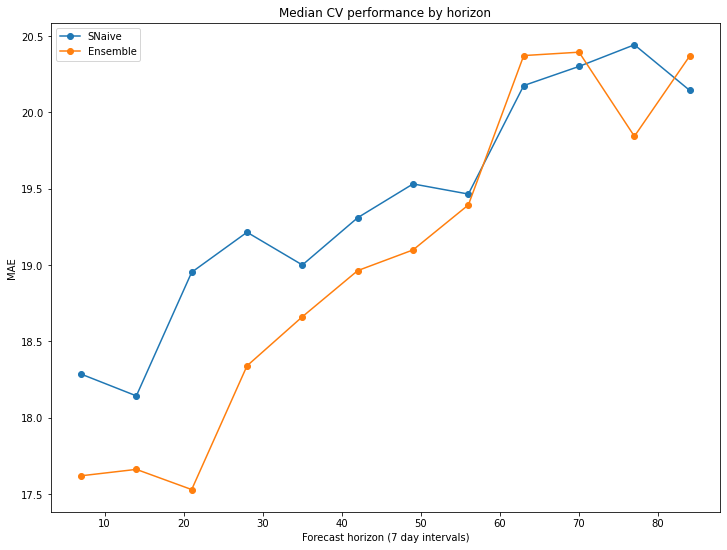

In [21]:
ax = compare.plot(figsize=(12,9), marker='o')
ax.set_ylabel('MAE');
ax.set_xlabel('Forecast horizon (7 day intervals)');
ax.set_title('Median CV performance by horizon')

In [22]:
# What about other forecast errors such as MAPE?
# import the metrics from forecast_tools and pass to the cv function.

from forecast_tools.metrics import mean_absolute_percentage_error